In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [97]:
dataAsıl=pd.read_csv("netflix_titles.csv")
dataAsıl.shape

(7787, 12)

In [98]:
dataAsıl.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."


In [99]:
## LabelEncoder kategoric veriyi sayısala dönüştürüyoruz
from sklearn import preprocessing
data=pd.read_csv("netflix_titles.csv")
lb=preprocessing.LabelEncoder()

yedekKolon1=lb.fit_transform(data[["show_id"]])
data["show_id"]=yedekKolon1

##datayı yedekliyoruz id ler ve gerçek bilgileri saklamak için
yedekData=data

yedekKolon2=lb.fit_transform(data[["type"]])
data["type"]=yedekKolon2

##LabelEncoder ile fit edileceği için hata vermemesi için null değer bulunna kolonlardaki null değerleri siliyoruz
data.dropna(subset=["country","director","rating","release_year"],inplace=True)

yedekKolon3=lb.fit_transform(data[["country"]])
data["country"]=yedekKolon3

yedekKolon4=lb.fit_transform(data[["director"]])
data["director"]=yedekKolon4

yedekKolon5=lb.fit_transform(data[["rating"]])
data["rating"]=yedekKolon5

##her hangi bir şekilde sayısal değere otomatik olarak dönüştürülmesi sonucunda çok uzun ve karmaşık string ifadeler
##bulunduğundan bir işe yaramayacak olan kolonları çıkarıyoruz
data.drop(columns=["title","cast","date_added","duration","listed_in","description"],inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [100]:
data.head(3) ## 1->tvShow   0->movie

,show_id,type,director,country,release_year,rating
1,1111,0,1788,264,2016,8
2,2222,0,1248,325,2011,5
3,3333,0,3344,478,2009,4


In [101]:
## tüm type değerlerinin ya 0 yada 1 olduğunu gösteriyor
data[data["type"]==2].shape[0]

0

In [102]:
data.iloc[:,1:5].head(3)## datada girdi kolonları

,type,director,country,release_year
1,0,1788,264,2016
2,0,1248,325,2011
3,0,3344,478,2009


In [103]:
data.corr()

,show_id,type,director,country,release_year,rating
show_id,1.000000,-0.012271,-0.001755,0.034366,-0.018371,-0.034239
type,-0.012271,1.000000,-0.008414,-0.000040,0.071756,0.110339
director,-0.001755,-0.008414,1.000000,-0.029612,-0.049467,0.024872
country,0.034366,-0.000040,-0.029612,1.000000,-0.046425,-0.173876
release_year,-0.018371,0.071756,-0.049467,-0.046425,1.000000,0.223505
rating,-0.034239,0.110339,0.024872,-0.173876,0.223505,1.000000


In [104]:
##Backward Elimination
import statsmodels.api as sm

data["ekKolon B0 için"]=np.ones(5189)

data_BW=data.iloc[:,[1,2,3,4,6]].values
data_BW=np.array(data_BW,dtype=float)
model=sm.OLS(data.iloc[:,5],data_BW).fit()
print(model.summary())
## 0.05(hata payı P>|t|) den büyük olan kolonları çıkarıp tekrar kontrol ediyoruz.

                            OLS Regression Results                            
Dep. Variable:                 rating   R-squared:                       0.087
Model:                            OLS   Adj. R-squared:                  0.086
Method:                 Least Squares   F-statistic:                     123.1
Date:                Tue, 02 Mar 2021   Prob (F-statistic):          1.55e-100
Time:                        21:54:57   Log-Likelihood:                -10659.
No. Observations:                5189   AIC:                         2.133e+04
Df Residuals:                    5184   BIC:                         2.136e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             1.0624      0.148      7.175      0.0

In [105]:
data.head(1)

,show_id,type,director,country,release_year,rating,ekKolon B0 için
1,1111,0,1788,264,2016,8,1.0


In [106]:
data.drop(columns=["ekKolon B0 için"],inplace=True)
data.head(1)

,show_id,type,director,country,release_year,rating
1,1111,0,1788,264,2016,8


In [107]:
data.iloc[:,1:5].head(1)

,type,director,country,release_year
1,0,1788,264,2016


In [108]:
##Linear-MultiLinear(more column than one) Predict
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

x_train, x_test, y_train, y_test = train_test_split(data.iloc[:,1:5] , data["rating"] , test_size=0.33,random_state=0)

LR=LinearRegression()
LR.fit(x_train,y_train)
y_pred=LR.predict(x_test)

y_pred.shape

(1713,)

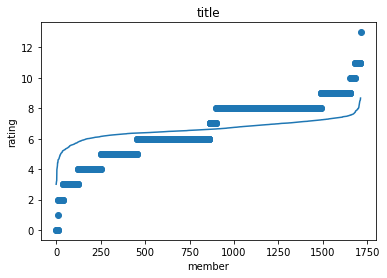

In [109]:
## sort and plot 
y_test=y_test.sort_values()

y_pred=pd.DataFrame(y_pred)
y_pred=y_pred.sort_values(by=0)

fig, ax = plt.subplots()
##ax.plot(range(0,1713,1), y_test)
ax.scatter(range(0,1713,1), y_test)
ax.plot(range(0,1713,1), y_pred)

ax.set(xlabel='member', ylabel='rating',
       title='title')
##ax.grid()

plt.show()

In [ ]:
###################################  Şablon  ##################################

## LabelEncoder kategoric veriyi sayısala dönüştürüyoruz
from sklearn import preprocessing
data=pd.read_csv("netflix_titles.csv")
lb=preprocessing.LabelEncoder()

yedekKolon1=lb.fit_transform(data[["show_id"]])
data["show_id"]=yedekKolon1


##OneHotEncoder Şablon kod
data_yedek=pd.read_csv("netflix_titles.csv")
yedek=data_yedek.iloc[:,1:2].values##1:2 -> yani type kolonu
lb=preprocessing.LabelEncoder()
yedek[:,0]=lb.fit_transform(data_yedek.iloc[:,1]) ##data_yedek.iloc[:,1] -> type kolonu 

ohe=preprocessing.OneHotEncoder()
yedek=ohe.fit_transform(yedek).toarray()
print(yedek)

yedek=pd.DataFrame(yedek)
yedek.head(20)



##Linear-MultiLinear(more column than one) Predict
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

x_train, x_test, y_train, y_test = train_test_split(data.iloc[:,0:5] , data["rating"] , test_size=0.33,random_state=0)

LR=LinearRegression()
LR.fit(x_train,y_train)
y_pred=LR.predict(x_test)

y_pred.shape


##Backward Elimination
import statsmodels.api as sm

data["ekKolon B0 için"]=np.ones(5189)

data_BW=data.iloc[:,[0,1,2,3,4,6]].values
data_BW=np.array(data_BW,dtype=float)
model=sm.OLS(data.iloc[:,5],data_BW).fit()
print(model.summary())
## 0.05(hata payı P>|t|) den büyük olan kolonları çıkarıp tekrar kontrol ediyoruz.



## sort and plot 
y_test=y_test.sort_values()

y_pred=pd.DataFrame(y_pred)
y_pred=y_pred.sort_values(by=0)

fig, ax = plt.subplots()
ax.plot(range(0,1713,1), y_test)
##ax.scatter(range(0,1713,1), y_test)
ax.plot(range(0,1713,1), y_pred)

ax.set(xlabel='member', ylabel='rating',
       title='title')
##ax.grid()

plt.show()
